
Understanding the Data -

* Each row represents a corn sample(eg.imagoai_core_0 up to imagoai_corn499)

* The first column is an identifier(hsi_id) Columns 0 through 447 represents hyperspectral imaging data with reflectance values across 448 bands(likely wavelengths), given the hsi_id and sequential sampling.

* The last column, vomitoxin_ppb, represents the concentration of vomitoxin(a mycotoxin) in parts per billion(ppb) for each sample.

In [1]:
#Exploratory Data Analysis

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load Datasets
data  = pd.read_csv('/content/TASK-ML-INTERN.csv')

#Dataset Statisticss
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDataset Summary Statistics:")
print(data.describe())

Dataset Overview:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443   

In [3]:
#Check for missng values
print("\n Missing Values Summary:")
print(data.isnull().sum())


 Missing Values Summary:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


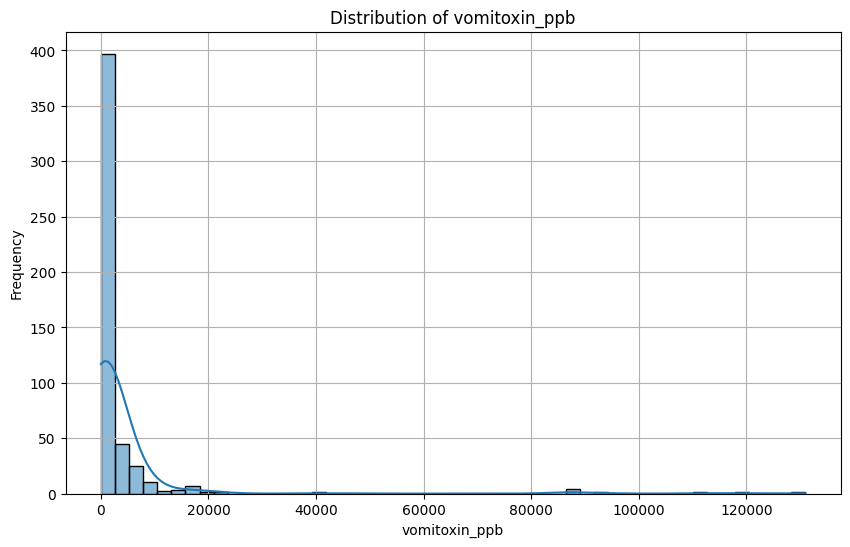

0

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing values
missing_values = data.isnull().sum().sum()

# Distribution of target variable (vomitoxin_ppb)
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb'], bins=50, kde=True)
plt.title('Distribution of vomitoxin_ppb')
plt.xlabel('vomitoxin_ppb')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

missing_values


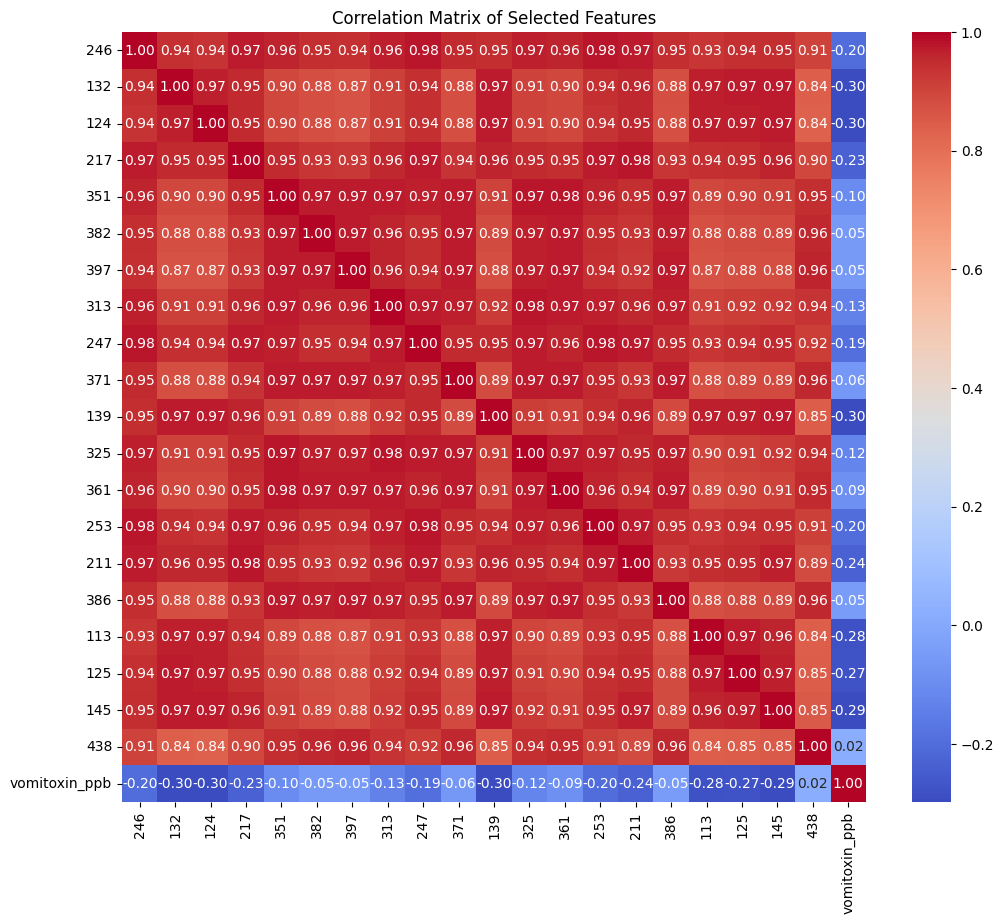

In [20]:
# Correlation matrix for a subset of features due to high dimensionality
# Selecting random subset of features for visualization
import numpy as np

subset_features = np.random.choice(data.columns[1:-1], size=20, replace=False)
subset_data = data[subset_features].join(data['vomitoxin_ppb'])

# Correlation matrix
corr_matrix = subset_data.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [4]:
#Handle Missing Values
data = data.dropna()

In [5]:
#Statistical Summary
print("\n Statistical Summary:")
print(data.describe())


 Statistical Summary:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.04

In [17]:

# Load the data
data = pd.read_csv('/content/TASK-ML-INTERN.csv')

# Dropping rows with missing values (if any)
data_clean = data.dropna()

# Extract features and target
X = data.iloc[:, 1:449].astype(float)
y = data['vomitoxin_ppb'].astype(float)

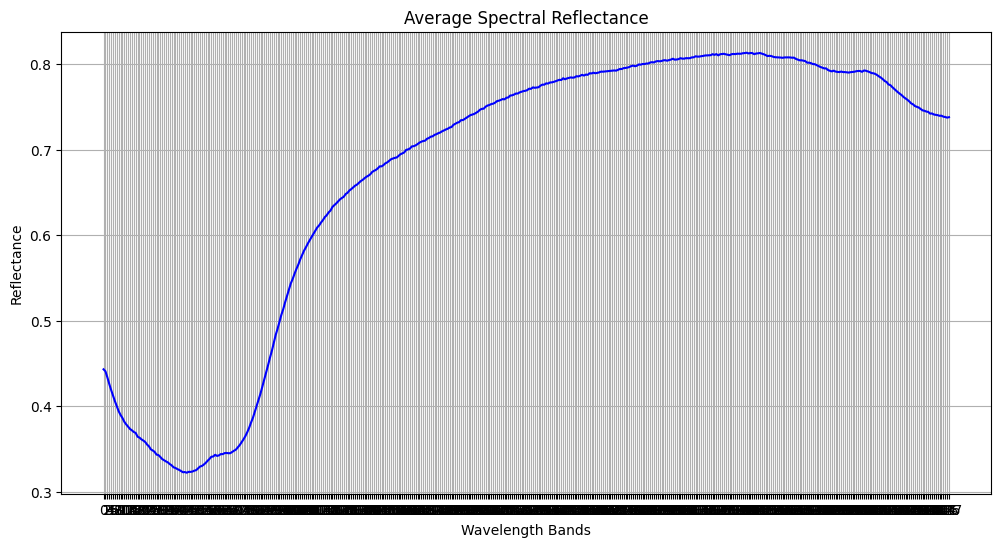

In [18]:

# Visualization: Spectral reflectance (Average Reflectance Plot)
plt.figure(figsize=(12, 6))
average_reflectance = X.mean()
plt.plot(average_reflectance, color='blue')
plt.title('Average Spectral Reflectance')
plt.xlabel('Wavelength Bands')
plt.ylabel('Reflectance')
plt.grid(True)
plt.show()

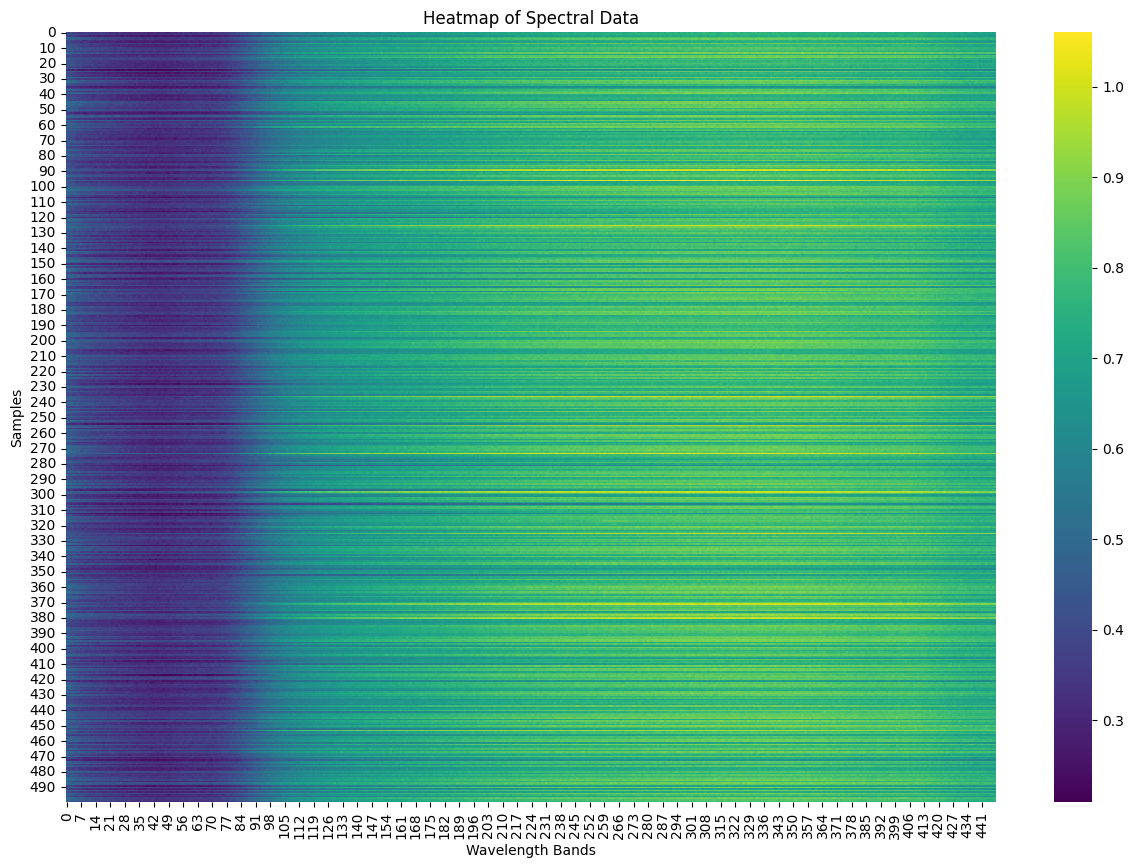

In [8]:
# Visualization: Heatmap for spectral data across samples
plt.figure(figsize=(15, 10))
sns.heatmap(data.iloc[:, 1:449], cmap='viridis')
plt.title('Heatmap of Spectral Data')
plt.xlabel('Wavelength Bands')
plt.ylabel('Samples')
plt.show()

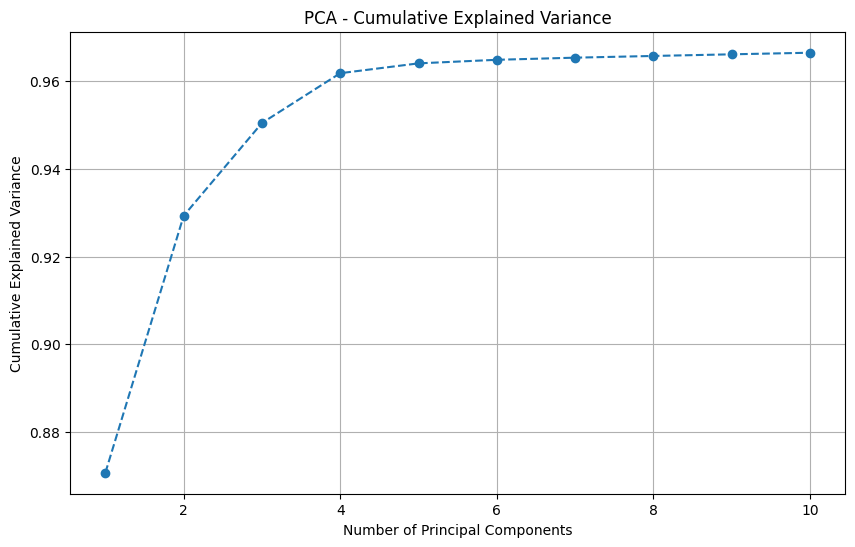

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('/content/TASK-ML-INTERN.csv')

#Dropping rows with missing values

data_clean = data.dropna()

# Extract features and target
X = data.iloc[:, 1:449].astype(float)
y = data['vomitoxin_ppb'].astype(float) #Target variable

#Standardize feautres before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca =PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

#Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plotting explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


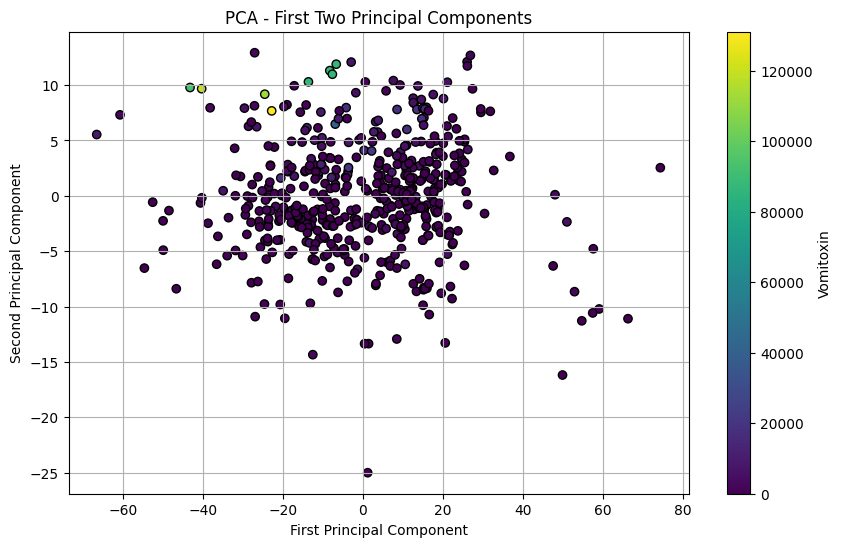

In [10]:
# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Vomitoxin')
plt.grid(True)
plt.show()

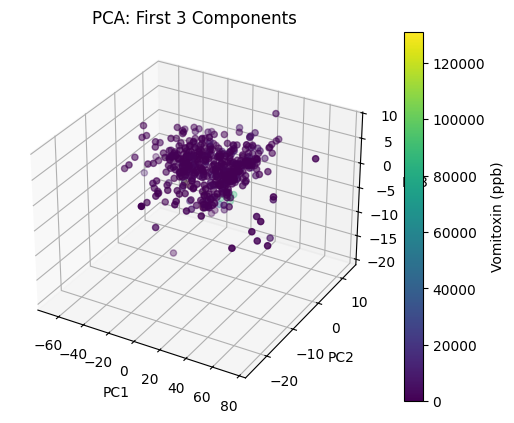

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['vomitoxin_ppb'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA: First 3 Components')
plt.colorbar(scatter, label='Vomitoxin (ppb)')
plt.show()

Dimensionality Reduction with t-SNE

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE (perplexity tuned for 500 samples)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

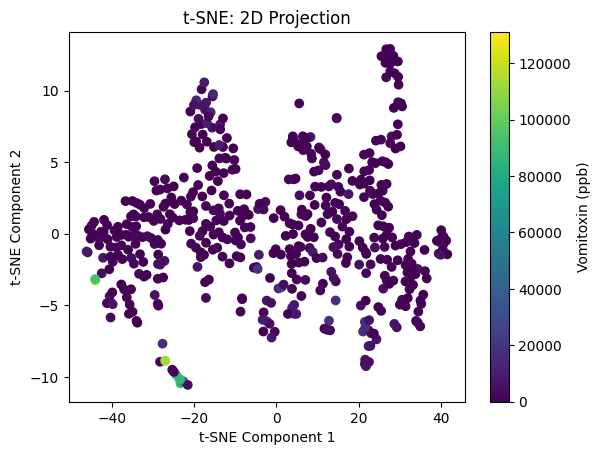

In [13]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['vomitoxin_ppb'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: 2D Projection')
plt.colorbar(label='Vomitoxin (ppb)')
plt.show()

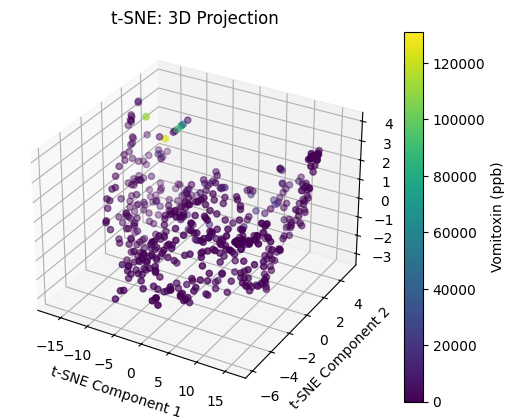

In [14]:
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=data['vomitoxin_ppb'], cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE: 3D Projection')
plt.colorbar(scatter, label='Vomitoxin (ppb)')
plt.show()